In [5]:
import pandas as pd
data = pd.read_csv("CleanCreditScoring.csv", encoding="ISO8859-1")
data

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,...,timeR,ageR,expensesR,incomeR,assetsR,debtR,amountR,priceR,finratR,savingsR
0,good,9,rent,60,30,married,no_rec,freelance,73,129,...,"time (48,99]","age (25,30]","exp (60,80]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (600,900]","priz (0,1e+03]","finr (90,100]","sav (4,6]"
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,...,"time (48,99]","age (50,99]","exp (40,50]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (900,1.1e+03]","priz (1.5e+03,1.8e+03]","finr (50,70]","sav (4,6]"
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,...,"time (24,36]","age (40,50]","exp (80,1e+04]","inc (190,1e+04]","asset (0,3e+03]","debt (-1,0]","am (1.4e+03,1e+05]","priz (1.8e+03,1e+05]","finr (50,70]","sav (0,2]"
3,good,0,rent,60,24,single,no_rec,fixed,63,182,...,"time (48,99]","age (0,25]","exp (60,80]","inc (140,190]","asset (0,3e+03]","debt (-1,0]","am (600,900]","priz (1.3e+03,1.5e+03]","finr (50,70]","sav (6,99]"
4,good,0,rent,36,26,single,no_rec,fixed,46,107,...,"time (24,36]","age (25,30]","exp (40,50]","inc (80,110]","asset (-1,0]","debt (-1,0]","am (0,600]","priz (0,1e+03]","finr (0,50]","sav (6,99]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,bad,1,rent,60,39,married,no_rec,fixed,69,92,...,"time (48,99]","age (30,40]","exp (60,80]","inc (80,110]","asset (-1,0]","debt (-1,0]","am (600,900]","priz (1e+03,1.3e+03]","finr (80,90]","sav (0,2]"
4442,good,22,owner,60,46,married,no_rec,fixed,60,75,...,"time (48,99]","age (40,50]","exp (50,60]","inc (0,80]","asset (0,3e+03]","debt (500,1.5e+03]","am (900,1.1e+03]","priz (1e+03,1.3e+03]","finr (70,80]","sav (0,2]"
4443,bad,0,owner,24,37,married,no_rec,partime,60,90,...,"time (12,24]","age (30,40]","exp (50,60]","inc (80,110]","asset (3e+03,5e+03]","debt (-1,0]","am (0,600]","priz (0,1e+03]","finr (50,70]","sav (0,2]"
4444,good,0,rent,48,23,single,no_rec,freelance,49,140,...,"time (36,48]","age (0,25]","exp (40,50]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (0,600]","priz (0,1e+03]","finr (90,100]","sav (6,99]"


In [2]:
import statistics as st

In [7]:
data["Income"].describe()

count    4446.000000
mean      140.629780
std        80.177896
min         1.000000
25%        90.000000
50%       124.000000
75%       170.000000
max       959.000000
Name: Income, dtype: float64

In [8]:
print("The smallest income is 1.00")
print("The largest income is 959.00")
print("The average income is 140.62")

The smallest income is 1.00
The largest income is 959.00
The average income is 140.62


In [9]:
data["Age"].describe()

count    4446.000000
mean       37.084121
std        10.986366
min        18.000000
25%        28.000000
50%        36.000000
75%        45.000000
max        68.000000
Name: Age, dtype: float64

In [10]:
print("The youngest is 18")
print("The oldest is 68")
print("The average age is 37")

The youngest is 18
The oldest is 68
The average age is 37


In [13]:
import numpy as np
np.corrcoef(data['Amount'], data['Income'])

array([[1.        , 0.19082011],
       [0.19082011, 1.        ]])

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(np.array(data['Amount']).reshape(-1, 1), np.array(data['Income']).reshape(-1, 1))
r_sq = model.score(np.array(data['Amount']).reshape(-1, 1), np.array(data['Amount']).reshape(-1, 1))
print("Coefficient of determination:", r_sq)
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Coefficient of determination: -3.516340841116304
Intercept: [107.15387369]
Coefficient: [[0.03222669]]


# Amount = 107.15387369 + 0.03222669 * Income

In [17]:
data.dtypes

Status         object
Seniority       int64
Home           object
Time            int64
Age             int64
Marital        object
Records        object
Job            object
Expenses        int64
Income          int64
Assets          int64
Debt            int64
Amount          int64
Price           int64
Finrat        float64
Savings       float64
seniorityR     object
timeR          object
ageR           object
expensesR      object
incomeR        object
assetsR        object
debtR          object
amountR        object
priceR         object
finratR        object
savingsR       object
dtype: object

In [19]:
data_int = data[['Seniority', 'Time', 'Age', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price', 'Finrat', 'Savings']]
data_int

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
0,9,60,30,73,129,0,0,800,846,94.562648,4.200000
1,17,60,58,48,131,0,0,1000,1658,60.313631,4.980000
2,10,36,46,90,200,3000,0,2000,2985,67.001675,1.980000
3,0,60,24,63,182,2500,0,900,1325,67.924528,7.933333
4,0,36,26,46,107,0,0,310,910,34.065934,7.083871
...,...,...,...,...,...,...,...,...,...,...,...
4441,1,60,39,69,92,0,0,900,1020,88.235294,1.533333
4442,22,60,46,60,75,3000,600,950,1263,75.217736,0.568421
4443,0,24,37,60,90,3500,0,500,963,51.921080,1.440000
4444,0,48,23,49,140,0,0,550,550,100.000000,7.941818


In [24]:
from sklearn.preprocessing import StandardScaler
features = ['Seniority', 'Time', 'Age', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price', 'Finrat']
# extracting out the features
x = data.loc[:, features].values
# Standardizing the features
x_standardized = StandardScaler().fit_transform(x)
x_standardized

array([[ 0.12336287,  0.92491136, -0.64488271, ..., -0.50298319,
        -0.98090001,  1.0764133 ],
       [ 1.10190227,  0.92491136,  1.90401744, ..., -0.08165963,
         0.31109689, -0.6034234 ],
       [ 0.2456803 , -0.71372418,  0.81163166, ...,  2.02495816,
         2.42252532, -0.27538999],
       ...,
       [-0.97749395, -1.53304195, -0.00765768, ..., -1.13496853,
        -0.79473789, -1.01505902],
       [-0.97749395,  0.10559359, -1.28210775, ..., -1.02963764,
        -1.45187425,  1.34310311],
       [-0.36590683,  0.92491136, -0.46281842, ...,  0.65565659,
         0.29836786,  0.45132611]])

In [25]:
cov_data = np.corrcoef(x.T)
cov_data

array([[ 1.        , -0.02187363,  0.50608874,  0.12568047,  0.12122411,
         0.12424073, -0.01934661, -0.00763935,  0.04112198, -0.07339167],
       [-0.02187363,  1.        , -0.05184996, -0.00171714, -0.02991524,
        -0.0830177 ,  0.05826747,  0.43085832,  0.12967683,  0.46864134],
       [ 0.50608874, -0.05184996,  1.        ,  0.24813694,  0.14755649,
         0.18098586, -0.04618789,  0.02903078,  0.04868519, -0.03451424],
       [ 0.12568047, -0.00171714,  0.24813694,  1.        ,  0.25500519,
         0.01893457,  0.01477083,  0.04953912,  0.04072803,  0.02458219],
       [ 0.12122411, -0.02991524,  0.14755649,  0.25500519,  1.        ,
         0.21911198,  0.14469675,  0.19082011,  0.21778928, -0.00340719],
       [ 0.12424073, -0.0830177 ,  0.18098586,  0.01893457,  0.21911198,
         1.        ,  0.19161949,  0.14428376,  0.19489363, -0.02505999],
       [-0.01934661,  0.05826747, -0.04618789,  0.01477083,  0.14469675,
         0.19161949,  1.        ,  0.05090225

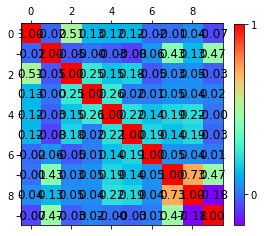

In [26]:
import matplotlib.pyplot as plt
img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=12, color='black', ha="center", va="center")
        
plt.show()

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components=pca.fit_transform(x_standardized)
principalDF=pd.DataFrame(data=principal_components, columns= ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDF, data[['Savings']]], axis = 1)
finalDf


,principal component 1,principal component 2,Savings
0,-0.252102,-0.901221,4.200000
1,0.439438,1.051200,4.980000
2,2.581198,1.259594,1.980000
3,-0.206015,-1.049540,7.933333
4,-2.744087,-0.108427,7.083871
...,...,...,...
4441,-0.240906,-1.044486,1.533333
4442,0.211576,0.565891,0.568421
4443,-2.221356,0.496734,1.440000
4444,-1.382613,-1.731837,7.941818


In [29]:
data_cat = data[['Status', 'Home', 'Marital', 'Records', 'Job']]
import prince
mca = prince.MCA(n_components=2, n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
mca = mca.fit(data_cat)
mca

MCA(n_iter=3, random_state=42)

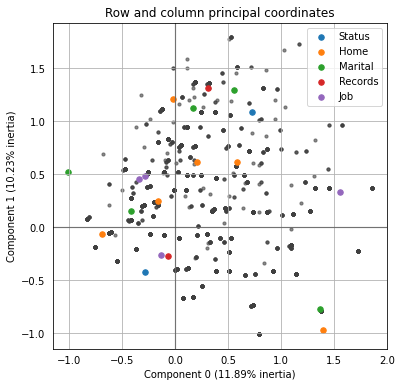

In [31]:
ax = mca.plot_coordinates( X=data_cat,
  ax=None,
   figsize=(6, 6),
 show_row_points=True,
  row_points_size=10,
 show_row_labels=False,
  show_column_points=True,
 column_points_size=30,
  show_column_labels=False,
  legend_n_cols=1 )